In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from matplotlib import colors
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import keras_tuner
import keras
import pandas as pd
from tensorflow.keras import layers
from keras import metrics
from sklearn import preprocessing
import math  
import datetime
import tensorflow_decision_forests as tfdf
import os
from keras.utils import plot_model
import tensorflow_datasets as tfds
from keras.utils import plot_model
import pydot
# import graphviz

global w 
global h 

/media/james/Datasets_Drive1/semg_for_basic_hand_movment_6/Database_1/female_2.mat
/media/james/Datasets_Drive1/semg_for_basic_hand_movment_6/Database_1/female_3.mat
(536821, 3)
[0.199706, 0.15117, 5]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

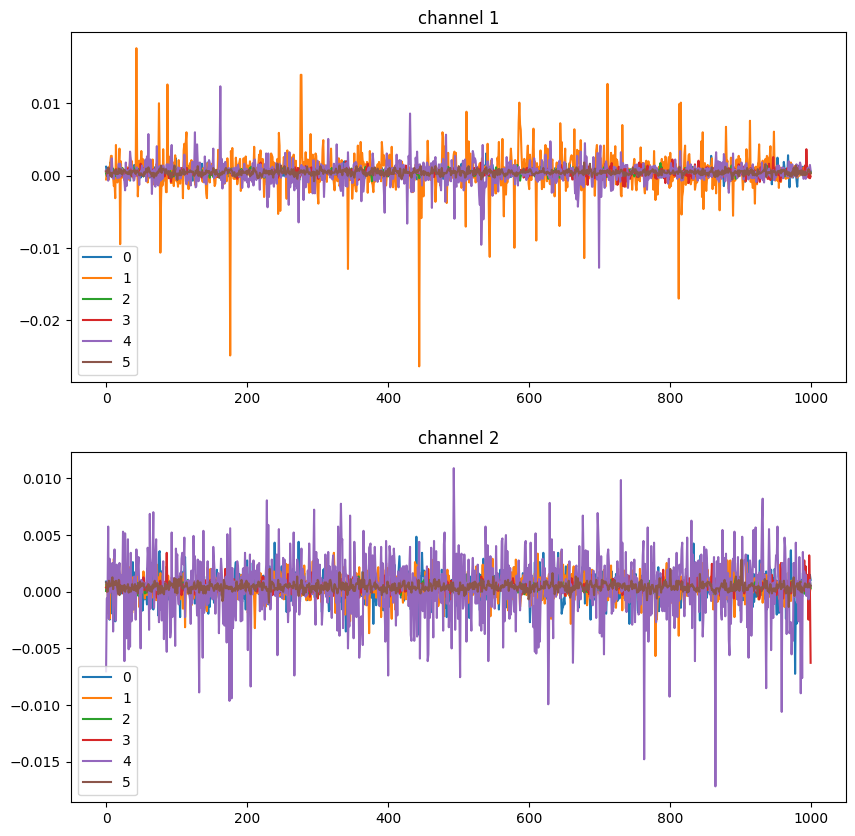

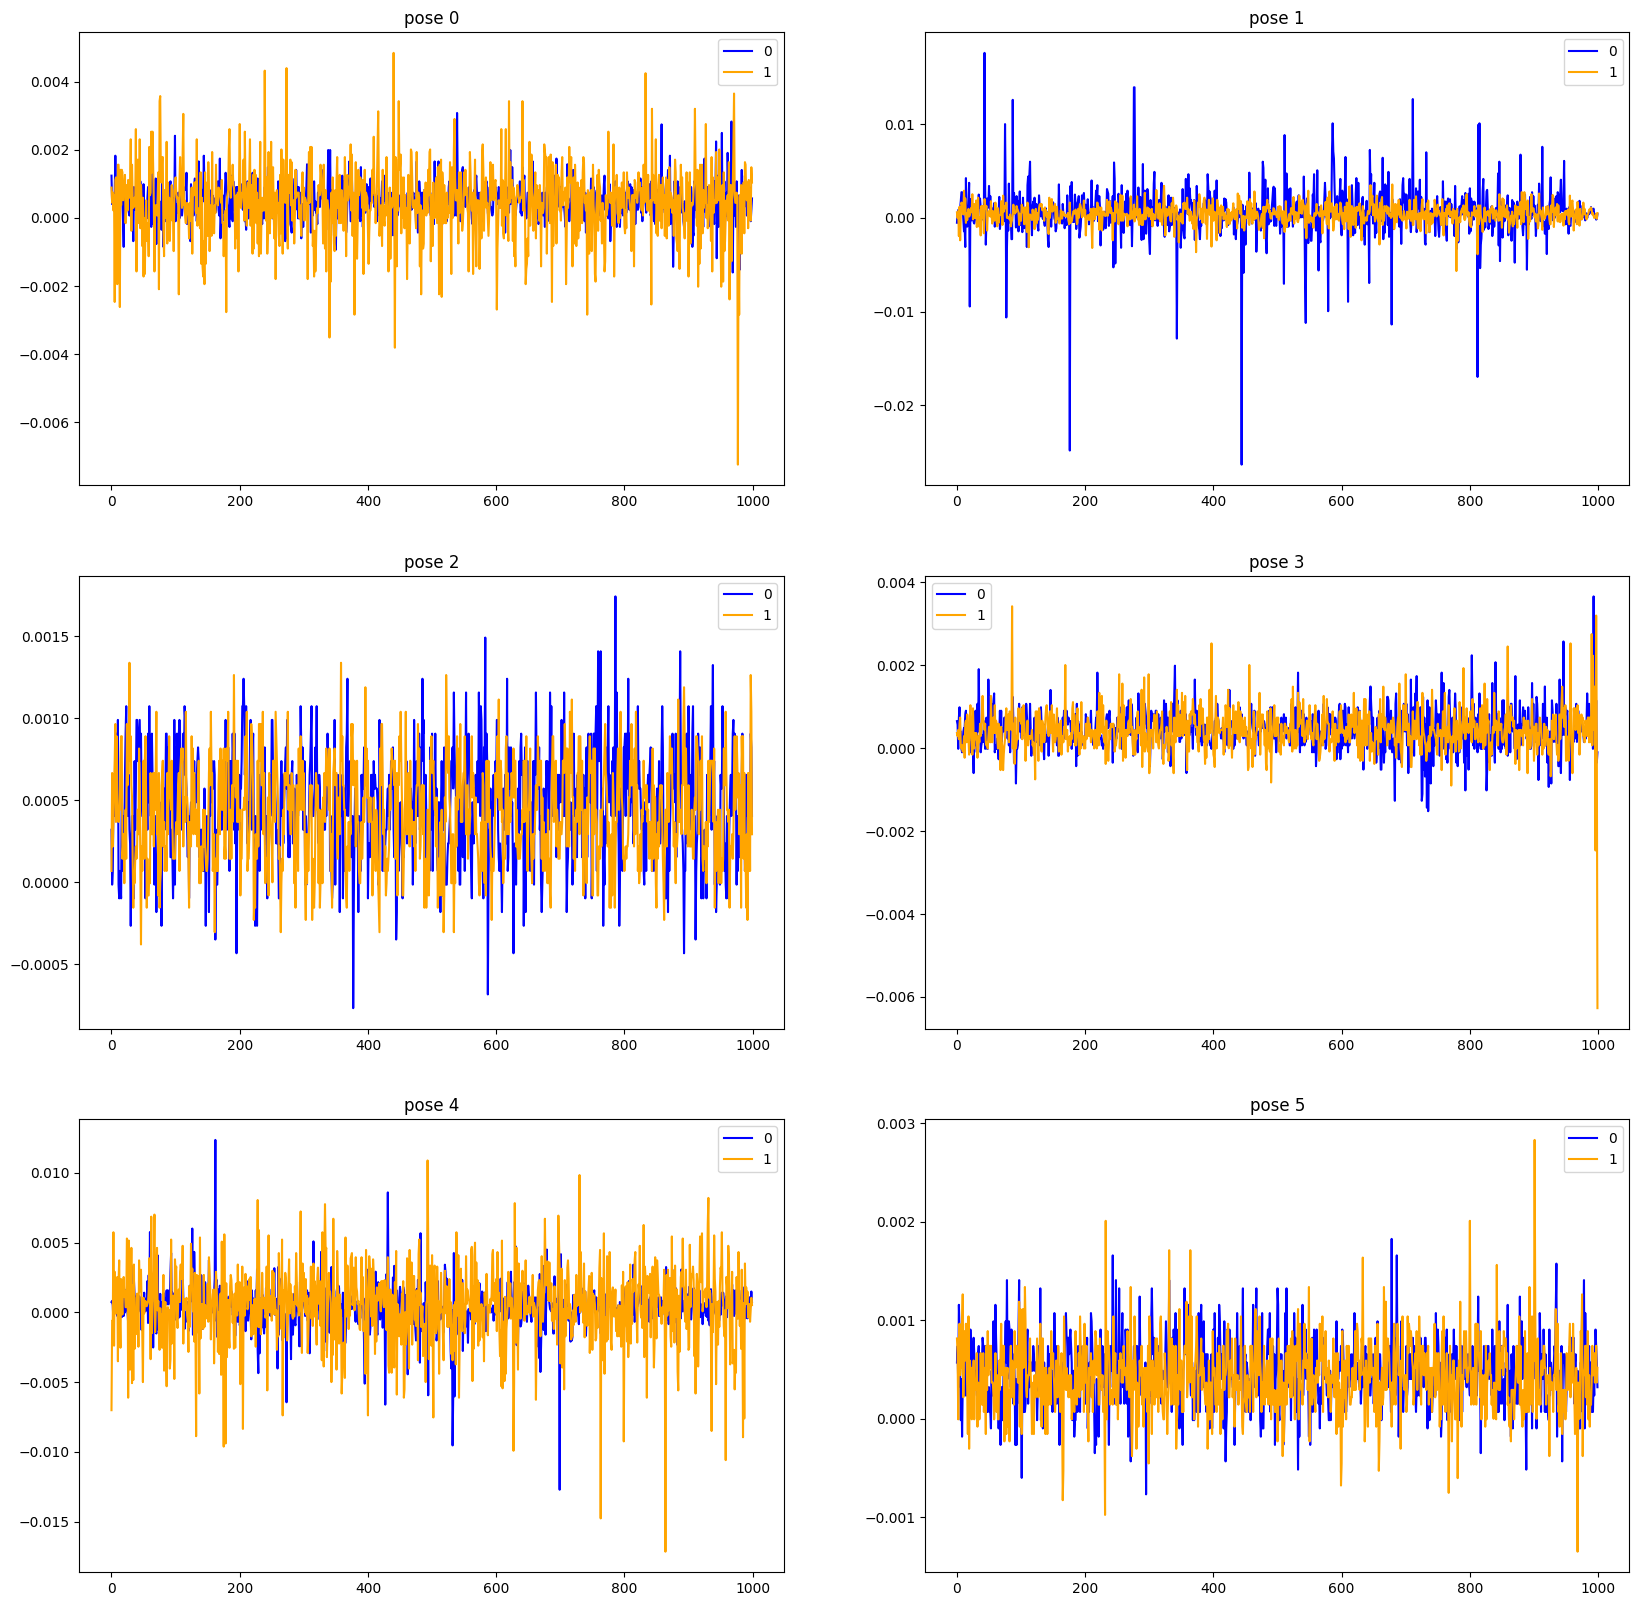

X shape: (268, 1600)


In [7]:
# ALT WAY TO GET TEST AND TRAIN DATA: MERGE & NO SHUFFLE


dataDir = "/media/james/Datasets_Drive1/semg_for_basic_hand_movment_6/Database_1/"
dataFiles=['female_1.mat','female_2.mat','female_3.mat','male_1.mat','male_2.mat']
dataFiles=['female_1.mat','male_1.mat','male_2.mat']
dataFiles=['female_2.mat','female_3.mat']
# dataFiles=['female_1.mat']

data = [] #processed and normalised with pose_idx
e = 2.718281828459045

def normalize_arr(arr,i):
    signal = arr.copy()
    # signal = e**signal
    # signal /= np.sum(signal)
    # signal = np.clip(signal,1e-7,1e+7)
    signal = signal.tolist()
    signal.append(int(i/2))
    signal = np.array(signal)
    return signal

def get_channel_pair(chn1,chn2,i):
    paired_data = []
    # label = list((np.array(chn1).T)[-1].T.astype(int))
    label = int(i/2)
    chn1 =  list(np.delete(chn1,0,1))
    chn2 =  list(np.delete(chn2,0,1))
    # print(np.array(chn1).shape)
    # print(label)
    # print('label[i]: ',label[i])
    for chunk1 in chn1:
        chunk2 = chn2[i].T
        chunk1 = chunk1.T

        while(len(chunk1)>0):
            row=[chunk1[0],chunk2[0],label]
            paired_data.append(row)

            chunk1 = list(chunk1)
            chunk2 = list(chunk2)
            chunk1.pop(0)
            chunk2.pop(0)

    return paired_data



for file in dataFiles:
    data_path = dataDir+file
    print(data_path)
    mat = scipy.io.loadmat(data_path)
    mat.pop("__header__")
    mat.pop("__version__")
    mat.pop("__globals__")
    i=0

    plot_interval = 100
    plot_index = 0

    for channel in mat: 
       
        if(i%2==0):
            channel2 =  channel[:-1]
            channel2 += '2'
            sigs1 = mat[channel] 
            sigs2 = mat[channel2]
            sigs1_norm = []
            sigs2_norm = []

            for signal in sigs1:
                # signal = normalize_arr(signal,i)
                if(signal[0]<2):
                    sigs1_norm.append(signal)
            for signal in sigs2:
                # signal = normalize_arr(signal,i)
                if(signal[0]<2):
                    sigs2_norm.append(signal)
            if i==0:
                data = get_channel_pair(sigs1_norm,sigs2_norm,i)
            else:
                None
                data_lc = get_channel_pair(sigs1_norm,sigs2_norm,i)
                data += data_lc
        i+=1

print(np.array(data).shape)
print(data[-3])



from sklearn import preprocessing

data_nm = np.copy(data)[:,:2]
data_nm.shape
nm_c1 =  preprocessing.normalize([data_nm.T[0]]).T.flatten()
nm_c2 =  preprocessing.normalize([data_nm.T[1]]).T.flatten()
# nm_c2 = data_nm.T[1].T
df_data_nm = pd.DataFrame(np.vstack((nm_c1,nm_c2)).T, columns = ['channel1','channel2'])

label_arr=[]

for row in data:
    label_arr.append(int(row[2]))
print(label_arr)

data_nm = df_data_nm.assign(label=label_arr)
data_nm

#==========================================

def GetSpacedElements(array, numElems = 4):
    return array[np.round(np.linspace(0, len(array)-1, numElems)).astype(int)]


import pandas as pd
import math  
def reshape_data(n,df_data):
    # get n channel 1 and n channel 2 into 1 sample
    chn1 = df_data['channel1'].to_numpy()
    chn2 = df_data['channel2'].to_numpy()
    label = df_data['label'].to_numpy()
    i = 0
    newShape_data = []
    while i < chn1.size:
        #currently  the size is 540000, tack batch 20 signals, the loop will rn 27000 times
        reshape_data = np.concatenate((chn1[i:i+n], chn2[i:i+n]))
        tmp = reshape_data.tolist()
        tmp.append(int(label[i]))
        tmp = np.array(tmp)

        if(len(reshape_data)==n*2):
            newShape_data.append(tmp)
        i += n

    newShape_data = np.array(newShape_data)
    return newShape_data

def split_X(arr):
    arr = arr.T
    arr = arr[0:-1]
    arr = arr.T
    return arr
def split_y(arr):
    arr = arr.T
    arr = arr[-1]
    arr = arr.T.astype(np.uint8)
    return arr
def reshape_arr(arr):
    new_shape = []
    for row in arr:
        n_len =int(math.sqrt(len(row)))
        row = row.reshape(n_len,n_len)
        new_shape.append(row)
    return np.array(new_shape)
def reshape_arr_img_transfer(arr,n):
    new_shape = []
    for row in arr:
        n_len = len(row)
        # row =np.pad(row,(0,n-n_len),'symmetric')
        row =np.pad(row,(0,n-n_len),'constant',constant_values=10)
        row = row.reshape(n,n)
        new_shape.append(row)
    return np.array(new_shape)
def signal_to_3channelimg(arr):
    print(arr[0].shape)
    rgb_batch_ts =  np.repeat(arr[..., np.newaxis], 3, -1)
    rgb_batch_ts.shape
    return rgb_batch_ts
# print(df)
def reshape_for_conv2d(t,w,h):
    train_size = int(len(t) * len(t[0])* len(t[0][0]) / (w*h))
    reshaped_tuple = t.reshape(train_size, w,h, 1)
    return reshaped_tuple


# DISPLAY
# sample = 200 
sample = 1000
rate = sample * 6
print(rate)

# test_d = np.copy(data)
test_d = np.copy(data_nm)

if True:
    test_d=  GetSpacedElements(test_d,rate)
test_d = test_d.T

# test_d = list(test_d)
b = np.array((np.hsplit(test_d, 6)))
# b = test_d


print(test_d.shape)
print(b.shape)
#////////////////////============

w = 20
h = 20
fig = plt.figure(figsize=(10, 10))
columns = 1
rows = 2

for index in range(1,2+1):
    idx = 0
    fig.add_subplot(rows, columns, index)
    for signal in b:
        plt.plot(signal[index-1],label=str(idx))
        idx += 1
    plt.title('channel '+str(index))
    plt.legend(ncol=1)
    
        
plt.show()
w = 20
h = 20
fig = plt.figure(figsize=(20, 20))
columns = 2
rows = 3
idx = 0

for signal in b:
    fig.add_subplot(rows, columns, idx+1)
    plt.plot(signal[0],color='blue',label=str(0))
    plt.plot(signal[1],color='orange',label=str(1))
    # plt.plot(signal[0],'r-d',label=str(0))
    # plt.plot(signal[1],'k-o',label=str(1))
    idx += 1
    plt.title('pose '+str(idx-1))
    plt.legend(ncol=1)
        
plt.show()
# END DISPLAY



df = data_nm
# df = pd.DataFrame(data.copy(),columns = ['channel1','channel2','label'])


mask = np.random.rand(len(df)) < 0.8
dataset_t_v = df[mask] #test & val
dataset_test = df[~mask]

val_test_mask = np.random.rand(len(dataset_t_v)) < 0.5
dataset_train = dataset_t_v[val_test_mask]
dataset_val = dataset_t_v[~val_test_mask]
img_w_h_len = 40
n = int(img_w_h_len * img_w_h_len / 2)

dataset_train_ar = reshape_data(n,dataset_train)
dataset_test_ar = reshape_data(n,dataset_test)
dataset_val_ar = reshape_data(n,dataset_val)
# print(dataset_train_ar[-20:][-1])


# print(dataset_train_ar[-20:][-1])

X = split_X(dataset_train_ar)
y = split_y(dataset_train_ar)
print("X shape:",X.shape)

X_val = split_X(dataset_train_ar)
y_val = split_y(dataset_train_ar)

X_test = split_X(dataset_test_ar)
y_test = split_y(dataset_test_ar)


# OPTIONAL TURN X TO NxN
X = reshape_arr(X)
X_val = reshape_arr(X_val)
X_test = reshape_arr(X_test)

# OPTIONAL TURN X TO NxN | N>= 150 transfer learning
tuple_size = 150
X_tl = reshape_arr_img_transfer(X,tuple_size)
# X_val_tl = reshape_arr_img_transfer(X_val,tuple_size)
# X_test_tl = reshape_arr_img_transfer(X_test,tuple_size)
w = img_w_h_len
h = img_w_h_len
X_test = reshape_for_conv2d(X_test,w,h)
X = reshape_for_conv2d(X,w,h)

# X_tl = signal_to_3channelimg(X_tl)
# X = signal_to_3channelimg(X)
# X_test = signal_to_3channelimg(X_test)
